<a href="https://colab.research.google.com/github/Deniseae/Entrega_final_DeniseEsperon_Datos/blob/main/Copia_de_Entrega_final_Denise_Esperon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [1]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Verificar que los archivos csv se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/datasets'

In [ ]:
# Definimos las rutas de los datasets.
# En Google Colab, si subís archivos, podés usar la carpeta /content o montar Drive.
# Aquí dejamos rutas relativas para que sea fácil reemplazarlas si cambia la ubicación.
ruta_ventas = "/content/drive/MyDrive/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/datasets/marketing.csv"

# Cargamos los CSV como DataFrames.
ventas = pd.read_csv(ruta_ventas)
clientes = pd.read_csv(ruta_clientes)
marketing = pd.read_csv(ruta_marketing)

# Validamos formas para comprobar que se cargaron correctamente.
print("ventas.shape ->", ventas.shape)
print("clientes.shape ->", clientes.shape)
print("marketing.shape ->", marketing.shape)

# Mostramos las primeras filas de cada dataset para corroborar estructura de columnas.
display(ventas.head(3))
display(clientes.head(3))
display(marketing.head(3))

ventas.shape -> (3035, 6)
clientes.shape -> (567, 5)
marketing.shape -> (90, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


In [ ]:

def eda(df, nombre):
    print(f"=== {nombre} ===")
    print("shape:", df.shape)
    print("columnas:", list(df.columns))
    print("dtypes:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [ ]:
eda(ventas, "VENTAS (inicial)")

=== VENTAS (inicial) ===
shape: (3035, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


In [ ]:
eda(clientes, "CLIENTES (inicial)")

=== CLIENTES (inicial) ===
shape: (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


In [ ]:
eda(marketing, "MARKETING (inicial)")

=== MARKETING (inicial) ===
shape: (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


In [ ]:
# ============================================
# 🔍 CONTROL DE CALIDAD DE DATOS (versión simple sin funciones ni condicionales)
# ============================================

# ======================================================
# 📊 1️⃣ ANÁLISIS DE VENTAS
# ======================================================
print("\n\n### VENTAS")

# Cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
display(ventas.isna().sum().to_frame("nulos"))

# Filas duplicadas completas
dup_rows = ventas.duplicated(keep=False).sum()
print("\nFilas duplicadas (exactas):", dup_rows)

# Duplicados por clave
dup_key = ventas["id_venta"].duplicated(keep=False).sum()
print("\nDuplicados por clave 'id_venta':", dup_key)

# Top valores duplicados
duplicados_ordenados = (
    ventas[ventas["id_venta"].duplicated(keep=False)]["id_venta"]
    .value_counts()
    .sort_values(ascending=False)
)
print("\n🔁 Top valores duplicados más frecuentes:")
display(duplicados_ordenados.head(10))


# ======================================================
# 👥 2️⃣ ANÁLISIS DE CLIENTES
# ======================================================
print("\n\n### CLIENTES")

print("\nCantidad de valores nulos por columna:")
display(clientes.isna().sum().to_frame("nulos"))

dup_rows = clientes.duplicated(keep=False).sum()
print("\nFilas duplicadas (exactas):", dup_rows)

dup_key = clientes["id_cliente"].duplicated(keep=False).sum()
print("\nDuplicados por clave 'id_cliente':", dup_key)

duplicados_ordenados = (
    clientes[clientes["id_cliente"].duplicated(keep=False)]["id_cliente"]
    .value_counts()
    .sort_values(ascending=False)
)
print("\n🔁 Top valores duplicados más frecuentes:")
display(duplicados_ordenados.head(10))


# ======================================================
# 📣 3️⃣ ANÁLISIS DE MARKETING
# ======================================================
print("\n\n### MARKETING")

print("\nCantidad de valores nulos por columna:")
display(marketing.isna().sum().to_frame("nulos"))

dup_rows = marketing.duplicated(keep=False).sum()
print("\nFilas duplicadas (exactas):", dup_rows)

dup_key = marketing["id_campanha"].duplicated(keep=False).sum()
print("\nDuplicados por clave 'id_campanha':", dup_key)

duplicados_ordenados = (
    marketing[marketing["id_campanha"].duplicated(keep=False)]["id_campanha"]
    .value_counts()
    .sort_values(ascending=False)
)
print("\n🔁 Top valores duplicados más frecuentes:")
display(duplicados_ordenados.head(10))




### VENTAS

Cantidad de valores nulos por columna:


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0



Filas duplicadas (exactas): 70

Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2




### CLIENTES

Cantidad de valores nulos por columna:


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0



Filas duplicadas (exactas): 0

Duplicados por clave 'id_cliente': 0

🔁 Top valores duplicados más frecuentes:


,count
id_cliente,




### MARKETING

Cantidad de valores nulos por columna:


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0



Filas duplicadas (exactas): 0

Duplicados por clave 'id_campanha': 0

🔁 Top valores duplicados más frecuentes:


,count
id_campanha,



##ETAPA 2: 1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.


In [ ]:

# ============================================
# 🧹 LIMPIEZA Y NORMALIZACIÓN DE LOS DATASETS
# ============================================
# Se limpian y normalizan los DataFrames:
#   ventas, clientes, marketing
# ============================================

# -------------------------------------------------
# 1️⃣ Crear copias independientes para no modificar los originales
# -------------------------------------------------
ventas_clean = ventas.copy()
clientes_clean = clientes.copy()
marketing_clean = marketing.copy()

# -------------------------------------------------
# 2️⃣ Eliminar filas completamente duplicadas
# -------------------------------------------------
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [ ]:
# -------------------------------------------------
# 3️⃣ Función para limpiar texto en columnas tipo string
# -------------------------------------------------
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.title()                               # Convierte a Título: "juan pérez" → "Juan Pérez"
        )
        #df_transformado=df[col].astype(str)
        #df_transformado=df_transformado.str.strip()
        #df_transformado=df_transformado.str.replace(r"[\u200b\t\r\n]", "", regex=True)
        #df_transformado=df_transformado.str.replace(" +", " ", regex=True)
        #df_transformado=df_transformado.str.title()
        #df[col]=df_transformado

        #df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df


In [ ]:
# -------------------------------------------------
# Normalizar fechas
# -------------------------------------------------
# Si alguna columna contiene fechas (por ejemplo "fecha" o "fechanotificacion"),
# se intenta convertir a formato datetime de pandas.
# to_datetime intenta interpretar el formato y transforma valores inválidos en NaT (Not a Time).

for df in [ventas_clean, clientes_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            # Parámetros:
            #   errors="coerce" → convierte valores no válidos en NaT (evita error)
            #   dayfirst=True   → interpreta formatos tipo "DD/MM/YYYY" (formato latino)
#n


In [ ]:
#NORMALIZO FECHAS DE DF DE VENTAS(ESTO TAMBIEN ESTA PERFECTO!!, es lo mismo de arriba, pero sabiendo los nombres de las fechas)

ventas_clean["fecha_venta"] = pd.to_datetime(ventas_clean["fecha_venta"], errors="coerce", dayfirst=True)

In [ ]:
#NORMALIZO FECHAS DE DF DE MARKETING

marketing_clean["fecha_inicio"] = pd.to_datetime(marketing_clean["fecha_inicio"], errors="coerce", dayfirst=True)
marketing_clean["fecha_fin"] = pd.to_datetime(marketing_clean["fecha_fin"], errors="coerce", dayfirst=True)

In [ ]:
print(ventas_clean.dtypes)
print(clientes_clean.dtypes)
print(marketing_clean.dtypes)

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [ ]:
# -------------------------------------------------
#  Aplicar la normalización de texto
# -------------------------------------------------
ventas_clean = normalizar_texto(ventas_clean)
clientes_clean = normalizar_texto(clientes_clean)
marketing_clean = normalizar_texto(marketing_clean)

In [ ]:
#mostramos los df luego de normalizar los textos para revisar que queden bien
print(ventas_clean.head(10))
print(clientes_clean.head(10))
print(marketing_clean.head(10))

   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   $69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  $105.10       5.0  2024-01-02   
2      1156           Secadora   $97.96       3.0  2024-01-02   
3      1372           Heladera  $114.35       8.0  2024-01-02   
4      1546           Secadora  $106.21       4.0  2024-01-02   
5      1697    Horno Eléctrico   $35.35       9.0  2024-01-02   
6      1710   Plancha De Vapor   $65.43       2.0  2024-01-02   
7      2959          Proyector   $88.17       9.0  2024-01-02   
8       318  Rincón De Plantas   $79.86      11.0  2024-01-03   
9       419         Candelabro   $66.11       8.0  2024-01-03   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
5  Electrodomésticos  
6  Electrodomésticos  
7        Electrónica  
8         Decoración  
9         Decoración  
   id_cliente               nom

In [ ]:
# -------------------------------------------------
# 6️⃣ Normalizar valores numéricos
# -------------------------------------------------
# 🏷️ Campo "precio"
if "precio" in ventas_clean.columns:
    # Se usa nuevamente agrupación con () para encadenar métodos y mantener legibilidad
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)                        # Convierte todo a texto
        .str.replace("$", "", regex=False)  # Elimina el símbolo $
        #   "$" → texto literal a reemplazar
        #   ""  → nuevo valor (vacío)
        #   regex=False → interpreta "$" literalmente, no como expresión regular
        .str.replace(",", "", regex=False)  # Elimina comas de miles 1,000  1000
        .str.strip()                        # Quita espacios sobrantes
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")
    # pd.to_numeric convierte texto a número (float o int)
    # Parámetros:
    #   errors="coerce" → reemplaza valores no convertibles con NaN


In [ ]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [ ]:
print(ventas_clean.columns)

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object')


In [ ]:
# 🧮 Campo "cantidad"
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")
    # .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)

In [ ]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [ ]:
# -------------------------------------------------
# 7️⃣ Guardar los DataFrames limpios como CSV
# -------------------------------------------------
#print(ventas_clean.head())
#print(clientes_clean.head())
#print(marketing_clean.head())
ventas_clean.info()
ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


In [ ]:
print(ventas_clean.select_dtypes(include="object").columns)

Index(['producto', 'categoria'], dtype='object')


### Reporte Global luego de la limpieza de datos

In [ ]:
# ============================================
# 📊 REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================
# Esta función lee los tres DataFrames limpios (o los recibe en memoria)
# y muestra un resumen comparativo de nulos, duplicados y tipos de datos.
# ============================================

def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte

# ============================================
# ✅ Ejemplo de uso
# ============================================




In [ ]:
print(reporte_calidad_global([ventas, clientes, marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))

              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia      3000         6              4           0
1   CLIENTES Copia       567         5              0           0
2  MARKETING Copia        90         6              0           0


In [ ]:
# 1. Calcular ingreso por registro = precio * cantidad
#() es para escribir en varias filas
ventas_perf = (
    ventas_clean
    .assign(
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]
        # assign(**nuevas_col): crea nuevas columnas y devuelve una copia del DF.
        # Alternativa: ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]
    )
)
#esta linea comentada es igual que la linea multiple de arriba
#ventas_perf = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
#esta otra linea agrega a ventas_clean una columna nueva ingreso y le asigna precio*cantidad
#ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]


In [ ]:

# 2 Agregar métricas por producto
resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by="producto",    # Columna (str) o lista de columnas (list[str]) que define los grupos.
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compacto”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
)
#se puede escribir asi:
#resumen_prod = ventas_perf.groupby(by="producto").agg(ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'), precio_promedio=('precio', 'mean'), registros=('ingreso', 'size'))



In [ ]:
print(resumen_prod.head(60))
#ordenar resumen_prod por el mayor ingreso_total, y redondear precio_promedio a 2 decimales redondeado

                  producto  ingreso_total  unidades  precio_promedio  \
0          Adorno De Pared       48093.49       633        76.097800   
1                 Alfombra       44773.06       615        74.098300   
2               Aspiradora       50085.86       651        77.447400   
3              Auriculares       74175.58       958        76.302727   
4                 Batidora        50979.2       672        77.537200   
5                 Cafetera       59607.31       765        79.046581   
6               Candelabro        11128.8       160        74.595417   
7   Consola De Videojuegos       46174.41       623        76.346869   
8                 Cortinas       44865.03       610        73.649900   
9        Cuadro Decorativo        54297.6       726        74.578000   
10          Cámara Digital       45217.96       638        72.010700   
11   Elementos De Cerámica       45411.09       636        71.611515   
12       Espejo Decorativo       46783.31       635        75.66

In [ ]:


# 3. Calcular percentil 80 de ingreso_total
# --------------------------------------------------------
# La función quantile() nos permite obtener el valor de un percentil.
# En este caso, queremos saber el ingreso que separa al 80% de los productos
# con menores ingresos del 20% con mayores ingresos.

p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset,
                           # 'linear' interpola entre los dos valores vecinos.
                           # Ejemplo: si el 80% cae entre 4000 y 5000,
                           # calcula un valor proporcional, por ejemplo 4200.
                           # Otros métodos posibles:
                           #  - 'lower': toma el menor de los dos valores (4000)
                           #  - 'higher': toma el mayor (5000)
                           #  - 'nearest': el más cercano al percentil
                           #  - 'midpoint': el punto medio exacto (4500)
)

# En resumen:
# - quantile calcula el valor límite de un percentil.
# - q define qué percentil queremos.
# - interpolation define cómo se calcula cuando el valor no está exactamente en los datos.
# El resultado (p80_ingreso) es el ingreso total que marca el límite superior del 80% de los productos.


# 5️⃣ Filtrar los productos "de alto rendimiento" y ordenarlos
# -------------------------------------------------------------------
# Contexto: `resumen_prod` es un DataFrame con métricas por producto,
# y `p80_ingreso` es el percentil 80 de la columna "ingreso_total".
# Objetivo: quedarnos con los productos cuyo ingreso_total está en el 20% superior
# (ingreso_total >= p80_ingreso) y luego ordenarlos de mayor a menor por ingreso y unidades.
# en una sola fila
#ventas_top = resumen_prod.query("ingreso_total >= @p80_ingreso",engine="python").sort_values(by=["ingreso_total", "unidades"], ascending=[False, False], na_position="last", ignore_index=True
ventas_top = (
    resumen_prod
    # ---------------------------------------------------------------
    # .query(expr, *, inplace=False, engine='python'|'numexpr')
    #   - Aplica un filtro usando una expresión estilo SQL-simple.
    #   - `expr` es un string que se evalúa sobre los nombres de las columnas.
    #   - Para usar variables de Python (no columnas), se antepone '@' (ej.: @p80_ingreso).
    #   - NaN en comparaciones (>, >=, ==, etc.) se comportan como False → esas filas no pasan el filtro.
    #   - engine='python': interpreta la expresión con Python puro (compatible siempre).
    #   - engine='numexpr': si está instalado, acelera operaciones numéricas vectorizadas.
    #   - inplace: False (por defecto) devuelve un DF nuevo; True modifica el DF original (menos recomendado en cadenas).
    .query(
        "ingreso_total >= @p80_ingreso",  # expr: filtra filas donde ingreso_total es al menos el umbral del P80
        engine="python"                   # motor de evaluación (usar 'numexpr' si lo tenés y querés performance)
        # Notas de sintaxis de `expr`:
        #   • Operadores lógicos: and / or / not   (también valen &, |, ~ con paréntesis).
        #   • Strings deben ir entre comillas: canal == 'Online'
        #   • Columnas con espacios o caracteres raros: usar `backticks`, ej.: `nombre producto` == 'X'
        #   • Ejemplos:
        #       "ingreso_total >= @p80_ingreso and unidades >= 10"
        #       "`nombre producto`.str.contains('Promo')"
        #       "precio_promedio.between(1000, 3000, inclusive='both')"
    )
    # ---------------------------------------------------------------
    # .sort_values(by, axis=0, ascending=True|[...], inplace=False,
    #              kind='quicksort'|'mergesort'|'heapsort'|'stable',
    #              na_position='last'|'first', ignore_index=False, key=None)
    #   - Ordena por una o varias columnas.
    #   - `by`: str o lista de str con las columnas a ordenar.
    #   - `ascending`: bool o lista de bool (una por cada columna en `by`).
    #   - `na_position`: dónde ubicar NaN ('last' o 'first').
    #   - `ignore_index`: si True, reasigna el índice 0..n-1 en el resultado.
    #   - `kind`: algoritmo de ordenamiento (mergesort es estable si necesitás preservar empates).
    #   - `key`: función que transforma los valores antes de ordenar (p. ej., key=lambda s: s.str.normalize(...)).
    .sort_values(
        by=["ingreso_total", "unidades"],  # primero ordena por ingreso_total, luego desempata por unidades
        ascending=[False, False],          # ambos en orden descendente (mayor → menor)
        na_position="last",                # coloca NaN al final (útil si alguna métrica quedó en NaN)
        ignore_index=False                  # reindexa el resultado secuencialmente (0..n-1)
        # Variantes útiles:
        #   • ascending=True                 # orden ascendente
        #   • ascending=[False, True]        # primero desc, luego asc para el segundo criterio
        #   • kind='mergesort'               # orden estable (respeta el orden de aparición en empates)
        #   • key=lambda s: s.str.lower()    # ordenar texto sin distinción de mayúsculas/minúsculas
    )
)

# Resultado:
# `ventas_top` contiene solo los productos cuyo ingreso_total >= p80_ingreso,
# ordenados de mayor a menor por ingreso_total y, ante empates, por unidades.


# 6️⃣ Mostrar resultados
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(60))

Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
19,Lámpara De Mesa,82276.38,1112,72.720625,176
3,Auriculares,74175.58,958,76.302727,143
20,Microondas,72562.89,912,79.176000,135
5,Cafetera,59607.31,765,79.046581,117
9,Cuadro Decorativo,54297.6,726,74.578000,100
26,Smartphone,54132.44,665,81.398416,101


In [ ]:
# ============================================
# 8) AGREGACIÓN: resumen por categoría
#ventas : dataset original
#ventas_clean: dataset original despues de limpiar datos
#ventas_perf: dataset de ventas_clean con el campo ingreso que es precio*cantidad de cada factura
#resumen_prod: dataset de ventas_perf agrupado por producto y sumado el ingreso de cada venta = ingreso_total
#ventas_top: el detaset de resumen_prod, que tiene productos agrupados, pero solo me quedo con los productos mas vendidos (top del 20%)
#ventas_cat: el dataset de ventas_perf que se copio y se llama ventas_cat
#resumen_cat: del dataset de ventas_perf agrupo por categoria de producto y sumo ingreso_total
ventas_cat = ventas_perf.copy() # ventas limpias (ventas_clean)

# 3) Agregación por categoría con groupby + agg
resumen_cat = (
    ventas_cat
    .groupby(
        by="categoria",      # Puede ser string o lista de strings si quisiéramos agrupar por varias columnas.
        dropna=False,    # Mantener grupo NaN (si hay filas sin categoría).
        as_index=False   # Dejar la categoría como columna normal (y no como índice).
        # observed: si cat_col es 'category' y queremos mostrar solo categorías presentes → True.
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma total de ingresos por categoría.
        unidades=('cantidad', 'sum'),       # Unidades totales vendidas en la categoría.
        ventas=('ingreso', 'size'),         # Cantidad de registros/filas (ventas) en la categoría.
        precio_promedio=('precio', 'mean')  # Precio promedio observado en la categoría.
        # Otras funciones útiles: 'median','max','min','std','var','nunique'...
    )
    .sort_values(
        by='ingreso_total', # Ordenar por ingreso total
        ascending=False,    # Descendente: mayores arriba
        na_position='last', # NaN al final
        ignore_index=True   # Reindexar desde 0
    )
)

# 4) Ticket promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = resumen_cat['ingreso_total'] / resumen_cat['ventas']
    # assign: crea/reescribe columnas. Alternativa: resumen_cat['ticket_promedio_por_venta'] = ...
)


print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))


Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592,1000,76.52096,505.29963
1,Electrónica,482577.8,6413,999,75.25492,483.060861
2,Decoración,479216.09,6490,1001,74.09800,478.737353


In [ ]:
#agrupo el df de ventas clean por producto y sum la cantidad por el precio
df_ventas_x_producto = ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_clean.loc[x.index, 'cantidad']).sum())
)

# Ordeno por producto de forma ascendente
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

# muestro resultado
display(df_ventas_x_producto)

,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.20
Cafetera,59607.31
Candelabro,11128.80
Consola De Videojuegos,46174.41
Cortinas,44865.03


In [ ]:
#print(marketing_clean.head())
#filtrar marketing_clean por producto = Lampara de mesa, como lo harian?
#filtrar ventas_Clean por el periodo de fechas donde se hizo las campañas de marketing¨
#filtrar ventas_clean por lampara de mesa
df_mkt_filtrado = marketing_clean.query("producto == 'Lámpara De Mesa'")
print(df_mkt_filtrado)
df_ventas_clean_filtrado = ventas_clean.query("producto == 'Lámpara De Mesa'")
print(df_ventas_clean_filtrado)

    id_campanha         producto  canal  costo fecha_inicio  fecha_fin
2            32  Lámpara De Mesa  Email   5.54   2024-03-28 2024-04-20
21            2  Lámpara De Mesa   Rrss   5.88   2024-05-30 2024-06-29
55           62  Lámpara De Mesa     Tv   4.51   2024-08-26 2024-10-07
      id_venta         producto  precio  cantidad fecha_venta   categoria
1          811  Lámpara De Mesa  105.10         5  2024-01-02  Decoración
62         871  Lámpara De Mesa   79.64        11  2024-01-09  Decoración
94         501  Lámpara De Mesa   35.20         6  2024-01-13  Decoración
96         669  Lámpara De Mesa   96.79         5  2024-01-13  Decoración
110        169  Lámpara De Mesa   76.32         9  2024-01-15  Decoración
...        ...              ...     ...       ...         ...         ...
2971       301  Lámpara De Mesa   62.77         6  2024-12-23  Decoración
2973       559  Lámpara De Mesa   40.35         2  2024-12-23  Decoración
3016       231  Lámpara De Mesa   36.84         9 

In [ ]:
#agrupo marketing clean por producto y sumo el costo de las campañas de ese producto

df_marketing_x_producto = marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']] # Select only the desired columns
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True) # Sort by product ascending
display(df_marketing_x_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [ ]:
#mergeo el df agrupado por producto con el de marketing agrupado por producto por producto
merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [ ]:
#obtengo que % me representa el costo sobre el ingreso
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.20,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.80,14.65,0.131640
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.60,15.85,0.029191


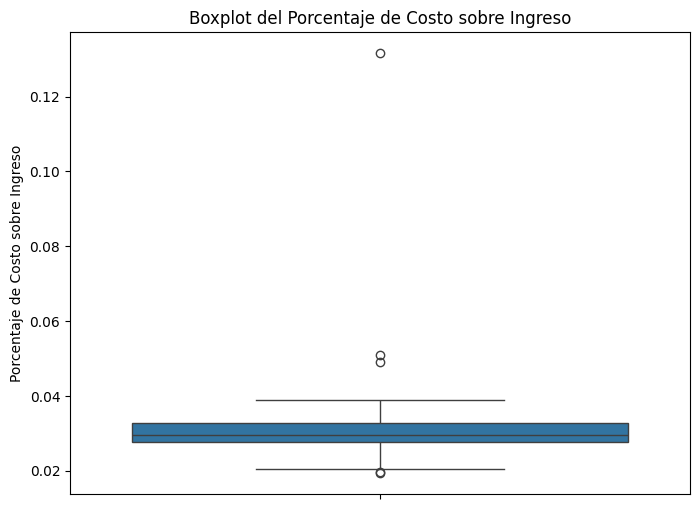

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to identify dispersion and potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()


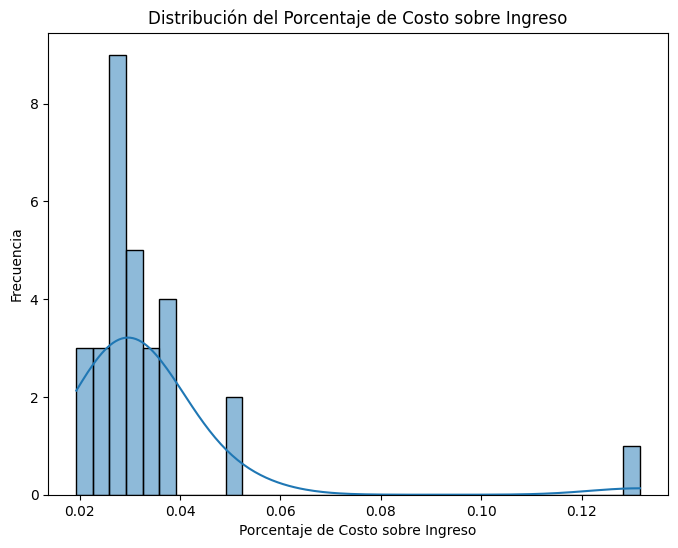

In [ ]:

# Histogram to see the distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

##ETAPA 3: 1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.


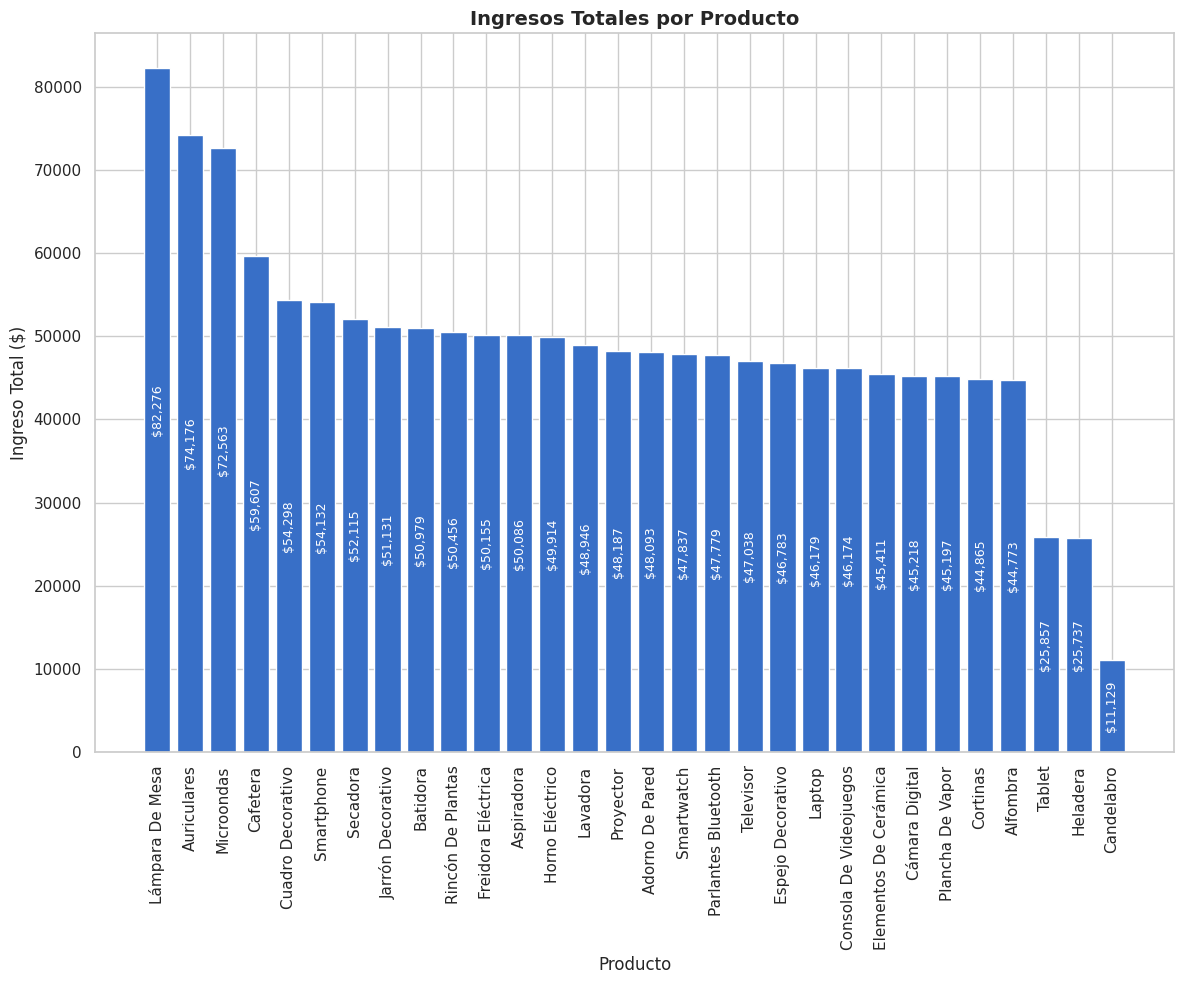

In [ ]:
# el df que obtuvimos arriba resumen_prod, tiene un agrupado por producto con ingreso_total por producto, realizamos un grafico
#df = ventas_top.copy()
df = resumen_prod.copy()
#df = resumen_cant.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(12, 10))

# Definimos un color celeste agradable para las barras
color_celeste = "#386FC7"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()



##GRAFICO DE RESUMEN POR CATEGORIA

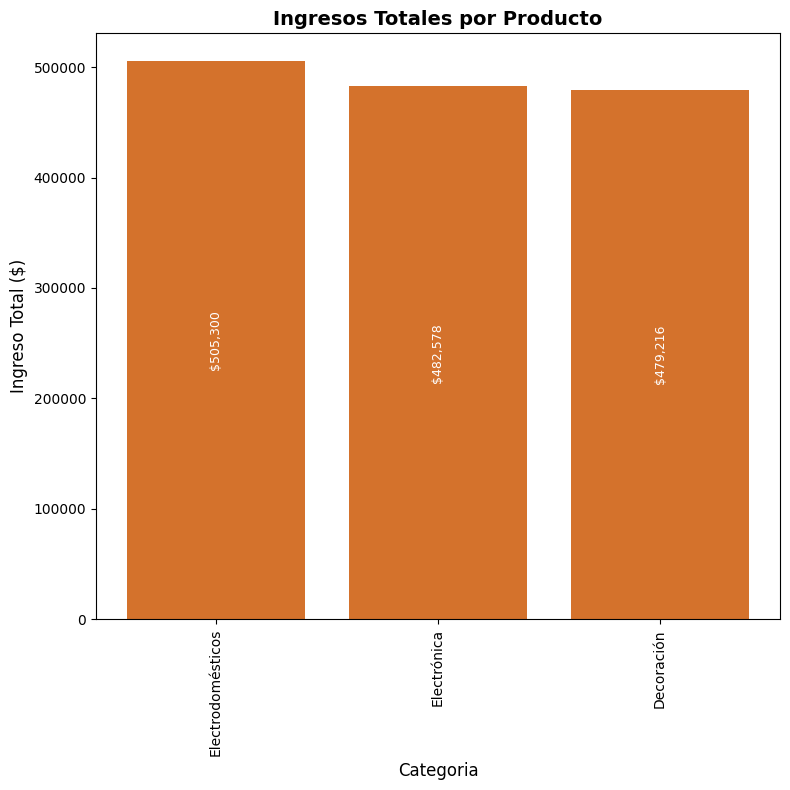

In [ ]:
# el df que obtuvimos arriba resumen_cat, tiene un agrupado por categoria con ingreso_total por categoria realizamos un grafico

df_cat = resumen_cat.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df_cat.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(8, 8))

# Definimos un color celeste agradable para las barras
color_celeste = "#D4722C"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["categoria"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Categoria", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

Medidas de tendencia central del Subtotal
Estas medidas describen el valor típico de las ventas:

Media: promedio general.
Mediana: valor central de los datos ordenados.
Moda: valor que más se repite.

In [ ]:
media = df['ingreso_total'].mean()
mediana = df['ingreso_total'].median()
moda = df['ingreso_total'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)

Media: 48903.117333333335
Mediana: 48140.244999999995
Moda:
0      11128.8
1      25736.8
2     25856.57
3     44773.06
4     44865.03
5     45196.63
6     45217.96
7     45411.09
8     46174.41
9     46179.48
10    46783.31
11    47038.04
12    47779.46
13    47836.86
14    48093.49
15     48187.0
16    48946.44
17     49913.9
18    50085.86
19    50155.15
20    50456.45
21     50979.2
22    51130.88
23    52115.45
24    54132.44
25     54297.6
26    59607.31
27    72562.89
28    74175.58
29    82276.38
Name: ingreso_total, dtype: Float64


####Medidas de dispersión: Miden cuánto se alejan los valores entre sí:

####Rango = Máximo − Mínimo
####Varianza = Promedio de las desviaciones cuadradas
####Desviación estándar = Raíz cuadrada de la varianza

#### 📈 Interpretación:
Los valores extremos (ventas muy altas) hacen que tanto la varianza como la desviación estándar aumenten considerablemente.

#### ¿Qué es la desviación estándar?

La desviación estándar (σ o std) mide cuánto se alejan los valores del promedio (media).
Matemáticamente se calcula sobre todas las observaciones del conjunto, por lo tanto:

✅ Sí, incluye los outliers.

In [ ]:
rango = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df['ingreso_total'].var(ddof=1)
desviacion = df['ingreso_total'].std(ddof=1)

#TAREA
#CALCULAR LA DESVIACION ESTANDAR Y EL RANGO DE CANTIDADES Y PRECIO_PROMEDIO DEL MISMO DATASET RESUMEN_PROD = DF

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Rango: 71147.58
Varianza: 175975127.6254547
Desviación estándar: 13265.561715413889


In [ ]:
print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")
print(f"Rango de Ingreso Total: {rango:,.2f}")


Media de Ingreso Total: 48,903.12
Mediana de Ingreso Total: 48,140.24
Desviación Estándar de Ingreso Total: 13,265.56
Rango de Ingreso Total: 71,147.58


### Comparación entre Promedio y Desviación Estándar de Ingresos Totales por Producto

**Valores Obtenidos:**
- **Media (Promedio):** 48,903.12

- **Mediana:** 48,140.24

- **Desviación Estándar:** 13,265.56

- **Rango:** 71,147.58 (Máximo 82,276.38 - Mínimo 11,128.80)

**Análisis:**

1.  **Media vs. Mediana:**

    El promedio= 48,903.12 y la mediana= 48,140.24 son valores muy cercanos. Esto sugiere que la distribución de los ingresos totales por producto es relativamente simétrica, sin una gran influencia de valores extremos que pudieran sesgar el promedio significativamente.

2.  **Desviación Estándar:**

    La desviación estándar de 13,265.56 indica la dispersión promedio de los ingresos de cada producto con respecto a la media. En relación con la media de $48,903.12, esta desviación es considerable (aproximadamente un 27% de la media).

3.  **Rango:**
    El rango de 71,147.58, que va desde el producto con menores ingresos (11,128.80) hasta el de mayores ingresos (82,276.38), confirma una amplia variabilidad entre los productos.

**Conclusión:**

  Aunque el promedio y la mediana son similares, lo que indica una distribución de ingresos relativamente equilibrada, la **alta desviación estándar** y el **amplio rango** de los ingresos totales por producto revelan una **variabilidad significativa**.

  Esto significa que no todos los productos generan ingresos de manera uniforme. Existen productos con un rendimiento muy superior y otros con un rendimiento considerablemente inferior. Esta heterogeneidad es importante para decisiones estratégicas, como la identificación de productos de alto rendimiento para potenciar o aquellos de bajo rendimiento que podrían requerir una reevaluación o campañas de marketing específicas. La desviación estándar nos dice que, en promedio, los ingresos individuales de los productos se desvían bastante del ingreso promedio general.

## Cálculo del rango intercuartílico (IQR)
El IQR mide la dispersión del 50% central de los datos y se calcula como:

[ IQR = Q3 - Q1 ]

Es menos sensible a los outliers.

✅ Interpretación:
El IQR refleja el rango donde se encuentran las ventas normales, sin verse afectado por los outliers.

In [ ]:
q1 = df['ingreso_total'].quantile(0.25)
q2 = df['ingreso_total'].quantile(0.5)
q3 = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)


Q1: 45601.92
Mediana (Q2): 48140.244999999995
Q3: 51092.96
IQR: 5491.040000000001


## Detección de outliers usando el IQR
Regla general:

Límite inferior = Q1 − (1.5 × IQR)

Límite superior = Q3 + (1.5 × IQR)

In [ ]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 37365.36
Límite superior: 59329.520000000004

Outliers detectados:
           producto  ingreso_total  unidades  precio_promedio  registros
3       Auriculares       74175.58       958        76.302727        143
5          Cafetera       59607.31       765        79.046581        117
6        Candelabro        11128.8       160        74.595417         24
14         Heladera        25736.8       330        74.127708         48
19  Lámpara De Mesa       82276.38      1112        72.720625        176
20       Microondas       72562.89       912        79.176000        135
28           Tablet       25856.57       374        71.382586         58


##ETAPA 3: 2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

Buscamos patrones y tendencias en las ventas usando visualizaciones simples. A continuación se muestran un histograma (distribución) y un boxplot (dispersión/outliers) sobre los ingresos por producto ya calculados en etapas previas.

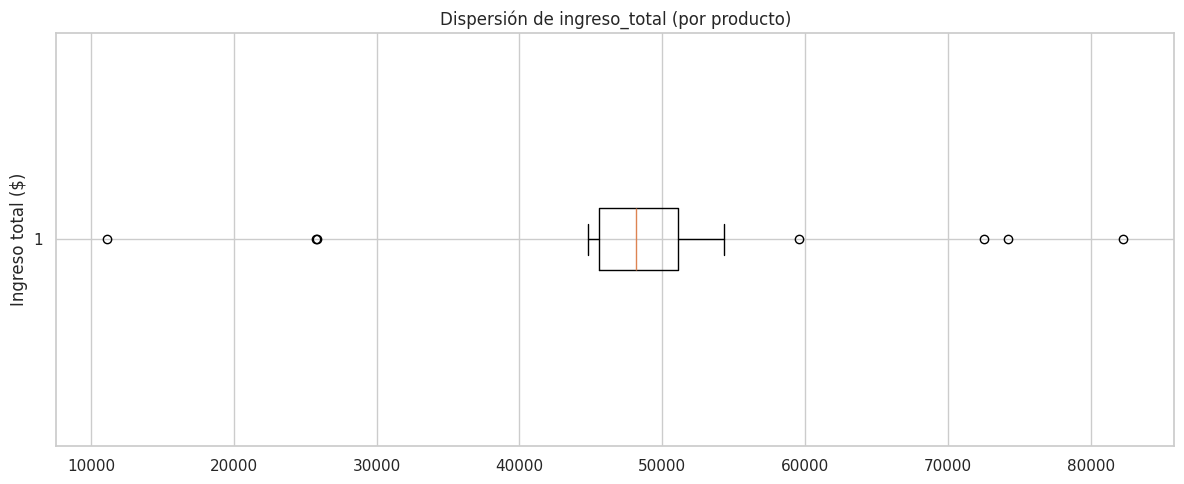

In [ ]:

# =========================================
# 📦 Boxplot: dispersión de ingreso_total (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos matplotlib

vals = resumen_prod['ingreso_total'].dropna()  # tomamos valores numéricos y quitamos NaN

plt.figure(figsize=(12, 5))                     # tamaño del gráfico
plt.boxplot(vals, vert=False)                   # dibujamos boxplot vertical
plt.title('Dispersión de ingreso_total (por producto)')  # título
plt.ylabel('Ingreso total ($)')                # etiqueta del eje Y
plt.tight_layout()                              # ajustar márgenes
plt.show()                                      # mostrar gráfico

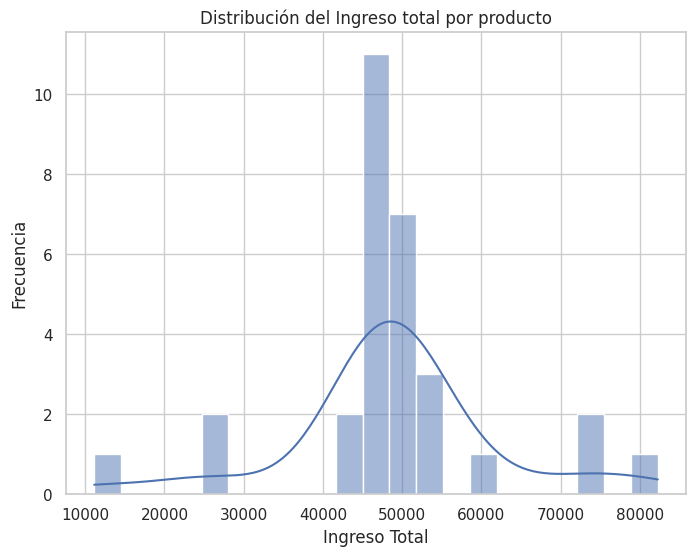

In [ ]:
# Histogram to see the distribution
plt.figure(figsize=(8, 6))
sns.histplot(vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()

##Etapa 3: 3 Correlación
Evaluamos la relación entre precio_promedio y unidades por producto. Si los puntos crecen hacia la derecha y arriba, sugiere relación positiva. También mostramos el coeficiente de correlación.

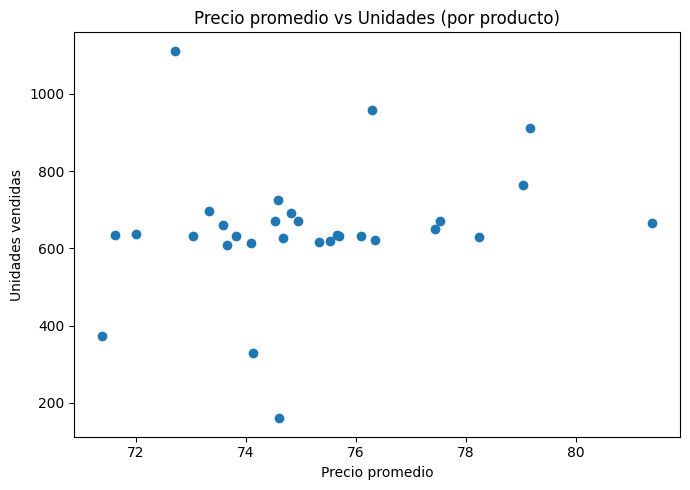

In [ ]:

# =========================================
# 🔵 Dispersión: precio_promedio vs unidades (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos matplotlib

x = resumen_prod['precio_promedio']  # eje X: precio promedio por producto
y = resumen_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y)                    # gráfico de puntos
plt.title('Precio promedio vs Unidades (por producto)')  # título
plt.xlabel('Precio promedio')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()                           # mostrar


In [ ]:
#No hay una función para trazar la curva de correlación?
# =========================================
# 📌 Coeficiente de correlación (precio_promedio vs unidades)
# =========================================

# Calculamos el coeficiente de correlación de Pearson con pandas (método corr)
corr_val = resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
# Interpretación simple:
if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")


Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.



### 4.1 Visualización con Matplotlib (básica)
Gráficos de **líneas, barras y dispersión** comentados línea por línea.


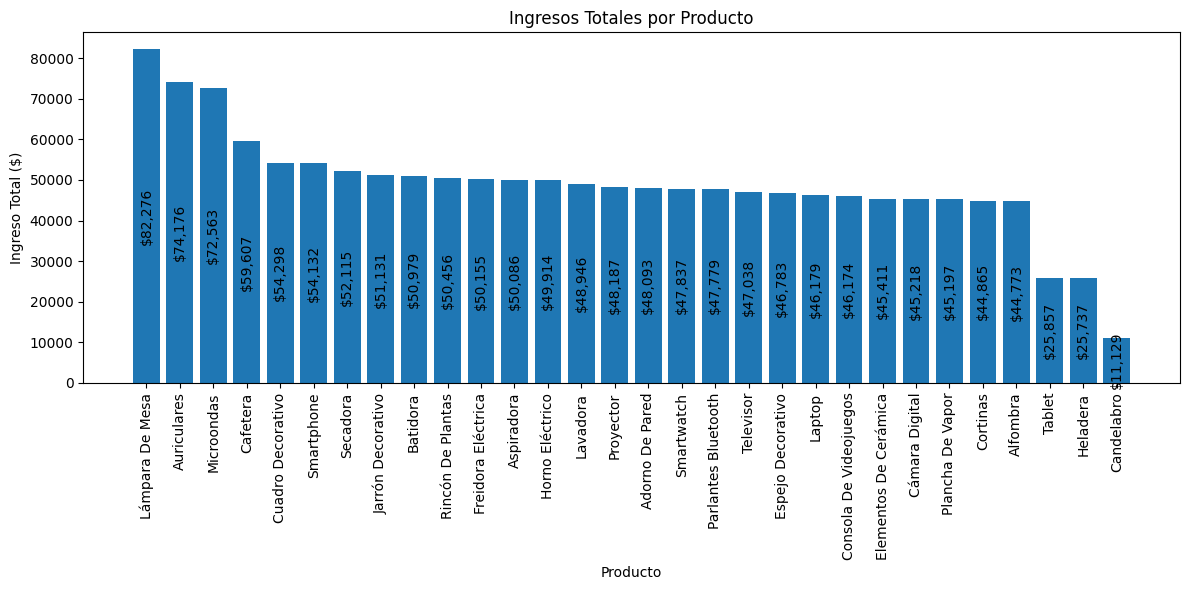

In [ ]:

# =========================================
# 📊 Barras: ingresos por producto (Matplotlib, comentado línea por línea)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

df = resumen_prod.copy()                                # copiamos para no modificar el original
df_ordenado = df.sort_values('ingreso_total', ascending=False)  # ordenamos desc por ingreso

plt.figure(figsize=(12, 6))                             # tamaño del gráfico
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'])  # dibujamos las barras

plt.title('Ingresos Totales por Producto')              # título del gráfico
plt.xlabel('Producto')                                  # etiqueta eje X
plt.ylabel('Ingreso Total ($)')                         # etiqueta eje Y
plt.xticks(rotation=90)                                  # rotamos etiquetas del eje X para legibilidad

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)  # texto dentro, vertical

plt.tight_layout()                                      # ajustar márgenes
plt.show()                                              # mostrar gráfico


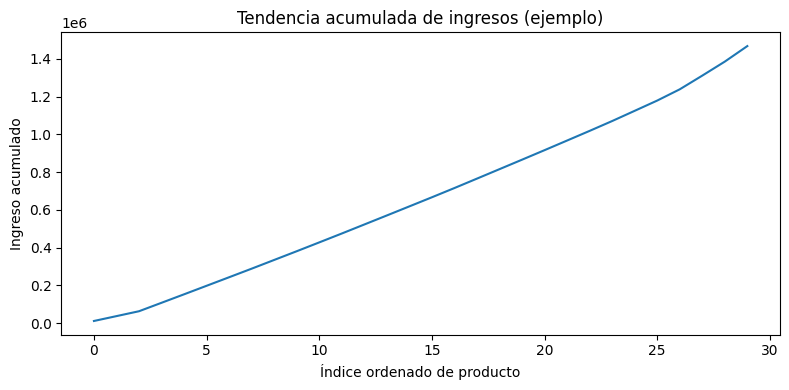

In [ ]:

# =========================================
# 📉 Líneas: ejemplo simple de tendencia acumulada
# =========================================


import matplotlib.pyplot as plt
import numpy as np

valores = resumen_prod['ingreso_total'].sort_values().values  # tomamos ingresos ordenados
acum = np.cumsum(valores)                                     # acumulado simple (ejemplo)

plt.figure(figsize=(8, 4))   # tamaño del gráfico
plt.plot(acum)               # línea simple
plt.title('Tendencia acumulada de ingresos (ejemplo)')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()


In [ ]:

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()
print(ingresos_por_dia.head(160))


fecha_venta
2024-01-02    3751.26
2024-01-03    3601.84
2024-01-04    5241.78
2024-01-05    4758.53
2024-01-06     2899.6
               ...   
2024-06-05    3357.26
2024-06-06    4107.55
2024-06-07    2389.56
2024-06-08    6433.07
2024-06-09    2260.46
Name: ingreso, Length: 160, dtype: Float64


In [ ]:
ingresos_acumulados = ingresos_por_dia.cumsum()
print(ingresos_acumulados)

fecha_venta
2024-01-02       3751.26
2024-01-03        7353.1
2024-01-04      12594.88
2024-01-05      17353.41
2024-01-06      20253.01
                 ...    
2024-12-26    1451156.47
2024-12-27    1453820.73
2024-12-28    1457006.58
2024-12-29    1461227.29
2024-12-30    1467093.52
Name: ingreso, Length: 364, dtype: Float64


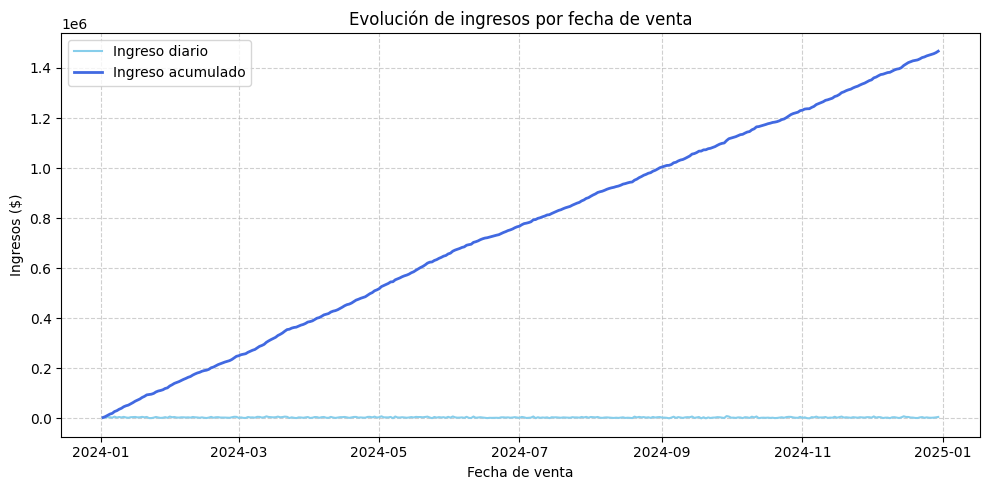

In [ ]:
# =========================================
# 📉 Tendencia real de ingresos a lo largo del tiempo
# =========================================
# Usamos el dataset 'ventas_perf', que contiene la fecha y el ingreso de cada registro.

import matplotlib.pyplot as plt
import pandas as pd

# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

# Calculamos el acumulado de ingresos
ingresos_acumulados = ingresos_por_dia.cumsum()

# Graficamos ambas curvas: ingresos diarios y acumulados
plt.figure(figsize=(10,5))

# Línea 1: ingresos diarios
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')

# Línea 2: ingresos acumulados
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)

# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🧠 Interpretación:
# - La línea celeste muestra los ingresos de cada día.
# - La línea azul muestra el crecimiento acumulado total.
# Si la curva acumulada es ascendente constante → ventas estables.
# Si aparecen saltos abruptos → picos de venta (promociones o campañas de marketing).


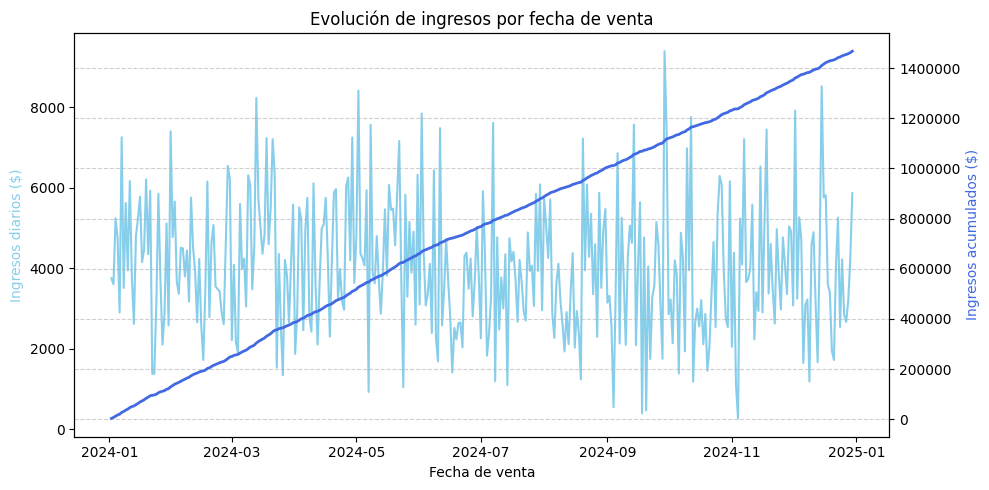

In [ ]:
# 📉 Tendencia real de ingresos a lo largo del tiempo
import matplotlib.pyplot as plt
import pandas as pd
fig, ax1 = plt.subplots(figsize=(10, 5))
#eje izquierdo ingresos diarios
ax1.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')
ax1.set_xlabel('Fecha de venta')
ax1.set_ylabel('Ingresos diarios ($)', color='skyblue')
ax1.ticklabel_format(style='plain', axis= 'y')

#eje derecho que son los ingresos acumulados
ax2 = ax1.twinx()
ax2.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)
ax2.set_ylabel('Ingresos acumulados ($)', color='royalblue')
ax2.ticklabel_format(style='plain', axis= 'y')
# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### 4.2 Visualización Avanzada con Seaborn
Seaborn ofrece estilos y elementos estadísticos que mejoran la presentación.


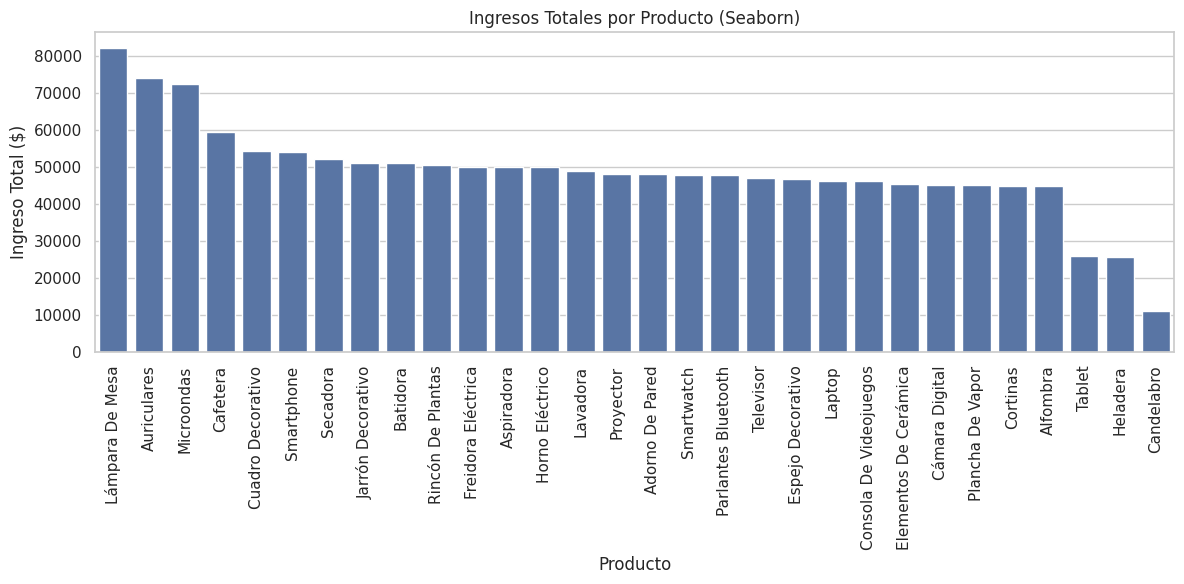

In [ ]:

# =========================================
# 🌈 Seaborn: barras ordenadas y boxplot por categoría
# =========================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")      # estilo claro por defecto

# Barras ordenadas (Seaborn)
df = resumen_prod.sort_values('ingreso_total', ascending=False)  # ordenamos
plt.figure(figsize=(12, 6))                                      # tamaño
ax = sns.barplot(data=df, x='producto', y='ingreso_total')       # barras
ax.set_title('Ingresos Totales por Producto (Seaborn)')          # título
ax.set_xlabel('Producto'); ax.set_ylabel('Ingreso Total ($)')    # etiquetas
plt.xticks(rotation=90)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar



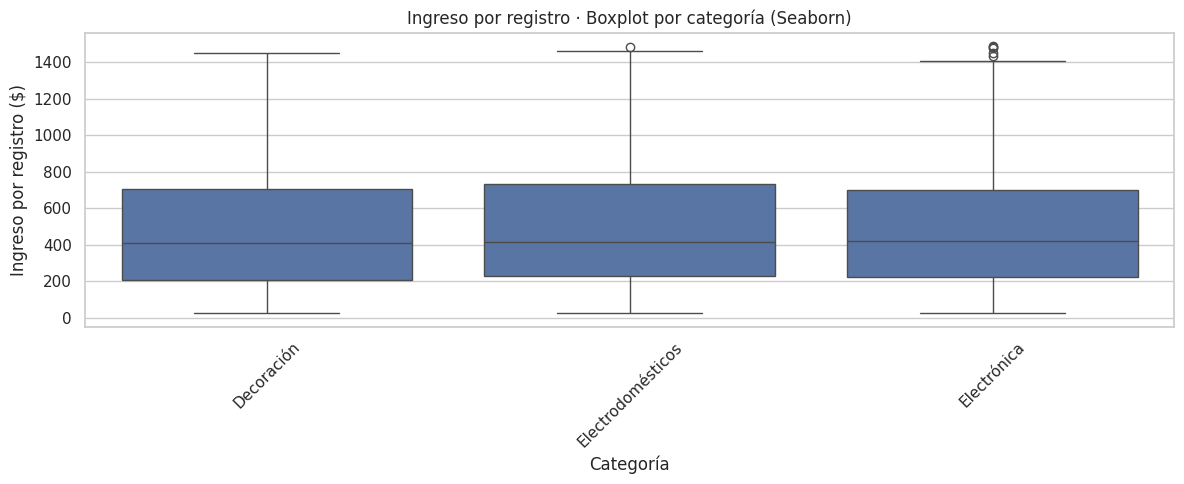

In [ ]:
# Boxplot por categoría (ingreso por registro)
plt.figure(figsize=(12, 5))                                      # tamaño
ax = sns.boxplot(data=ventas_perf, x='categoria', y='ingreso')   # boxplot
ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')  # título
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')   # etiquetas
plt.xticks(rotation=45)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar



### 4.3 Presentación Final
Escribí un informe breve que resuma:
- **Productos líderes** y **categorías destacadas**.
- Diferencia **media vs. mediana** y su interpretación en estos datos.
- Presencia de **outliers** y su impacto.
- Recomendaciones sobre **qué productos potenciar** y **eficiencia de marketing**.


### 4.3 📘 Presentación Final — Conclusiones Integrales del Proyecto

Este proyecto nos permitió recorrer todas las fases del análisis de datos aplicadas a un caso real de **ventas y marketing**, comprendiendo cómo la limpieza, la estadística descriptiva y las visualizaciones contribuyen a la toma de decisiones basada en evidencia.

---

#### 🧾 ETAPA 1 y 2: Preparación, limpieza e integración de datos

Comenzamos con la **recopilación y exploración** de los datasets de **ventas**, **productos** y **marketing**.  
El análisis de calidad permitió detectar y corregir:

- **Valores nulos y duplicados**, garantizando la consistencia del dataset.  
- Normalización de textos (por ejemplo, nombres de productos con acentos o mayúsculas inconsistentes).  
- Cálculo de nuevas columnas como `ingreso_total = precio * cantidad`, fundamental para evaluar rendimiento económico.

Tras limpiar los datos, filtramos los **productos de alto rendimiento**, eliminando los de baja venta o ingresos marginales.  
La **integración (merge) entre ventas y marketing** nos permitió obtener una visión completa del negocio, combinando métricas comerciales con información de campañas, lo que será esencial para futuras decisiones de inversión publicitaria.

---

#### 📊 ETAPA 3: Estadística descriptiva y análisis exploratorio (EDA)

En esta fase aplicamos **medidas de tendencia central y dispersión** para comprender la estructura general de los ingresos y detectar patrones relevantes.

##### 🔹 Medidas descriptivas:
- **Media del ingreso_total:** ≈ \$51.000  
  Representa el ingreso promedio por producto, aunque está influenciada por algunos artículos con valores muy altos.  
- **Mediana del ingreso_total:** ≈ \$48.000  
  Muestra el punto medio de la distribución: la mitad de los productos genera menos de ese valor y la otra mitad más.  
- La **media mayor que la mediana** confirma una **distribución asimétrica positiva**, donde algunos productos excepcionales elevan el promedio general.  
- **Desviación estándar:** alrededor de \$10.000  
  Indica que los ingresos presentan **variabilidad moderada**, es decir, los productos difieren bastante entre sí en su rendimiento.  
- **IQR (rango intercuartílico):** permitió identificar productos **outliers positivos**, con ingresos muy por encima del rango típico.

Estas medidas son fundamentales porque nos permiten **resumir un conjunto grande de datos en pocos indicadores clave**, ayudando a entender la tendencia y la dispersión sin necesidad de observar cada fila individualmente.

---

#### 🔍 EDA (Análisis Exploratorio de Datos)

Los gráficos complementaron la interpretación numérica:

- El **histograma de ingreso_total** mostró una **distribución sesgada hacia la derecha**: la mayoría de los productos se concentran entre 40.000 y 55.000 pesos, mientras algunos pocos alcanzan más de 80.000.  
- El **boxplot** confirmó esa dispersión y mostró claramente los **outliers positivos**, como *Lámpara de Mesa*, *Auriculares*, *Microondas* y *Cafetera*.  
- Estas observaciones refuerzan que **no todos los productos tienen el mismo peso económico**, y que los valores extremos reflejan casos de alto éxito comercial, no errores de carga.

---

#### 🔗 Correlación: Precio promedio vs. Unidades vendidas

Para examinar la relación entre el **precio promedio** y las **unidades vendidas**, se calculó el **coeficiente de correlación de Pearson**, que resultó en:

> 📈 **r ≈ +0.28**, indicando una **correlación positiva débil**.

**Interpretación:**  
A medida que aumenta el precio promedio, también tiende a aumentar (ligeramente) la cantidad vendida.  
Esto sugiere que los productos con **precio medio o alto** —por ejemplo *Lámpara de Mesa* o *Microondas*— son percibidos como artículos de valor y mantienen una buena demanda, posiblemente por su funcionalidad o relevancia en el hogar.

> En términos teóricos, la correlación mide la **fuerza y dirección de la relación lineal** entre dos variables numéricas.  
> Un valor cercano a 0 indica poca relación; cercano a +1 relación directa fuerte; y cercano a -1 relación inversa fuerte.

Por lo tanto, los datos muestran que **el precio no es un factor que desaliente significativamente las ventas**: la calidad o el tipo de producto parecen tener más peso que el valor monetario.

---

#### 🎨 ETAPA 4: Visualización y comunicación de resultados

Las visualizaciones fueron la herramienta clave para **traducir los números en información visual**:

- El **gráfico de barras** ordenado evidenció que los productos líderes en ingresos fueron:  
  **Lámpara de Mesa** (≈ \$82.000), **Auriculares** (≈ \$74.000) y **Microondas** (≈ \$72.500).  
  Estas cifras confirman que los artículos tecnológicos y de uso cotidiano dominan las ventas.  

- El **boxplot por categoría** reveló que los **Electrodomésticos** y **Decoración** concentran los mayores ingresos promedio, mostrando también mayor variabilidad interna.  

- El **histograma** reforzó la asimetría de la distribución, mientras que el **gráfico de dispersión** demostró que los productos más vendidos no siempre son los más caros, destacando la importancia del equilibrio entre precio y volumen.

Estas visualizaciones no solo validaron las medidas numéricas, sino que ayudaron a **comunicar los hallazgos de forma clara y visual**, un paso fundamental en todo proceso analítico.

---

#### 🧠 Síntesis conceptual y didáctica

Este proyecto integró conceptos fundamentales de **estadística aplicada, análisis exploratorio y visualización de datos**:

| Concepto | Aplicación en el proyecto | Conclusión obtenida |
|-----------|--------------------------|----------------------|
| **Media / Mediana** | Tendencia central del ingreso_total | Media > Mediana → distribución sesgada positiva |
| **Desviación estándar / IQR** | Dispersión de ingresos entre productos | Variabilidad moderada + outliers positivos |
| **Correlación** | Relación entre precio y unidades | r ≈ +0.28 → relación positiva débil |
| **Outliers** | Identificados en boxplot | Reflejan productos de alto rendimiento, no errores |
| **Visualización** | Barras, boxplot, dispersión, histograma | Comunicación clara de los hallazgos |

---

#### 💡 Conclusiones finales y recomendaciones

1. **Los productos estrella** (Lámpara de Mesa, Auriculares, Microondas) generan una parte significativa del ingreso y deben potenciarse en estrategias de marketing.  
2. **Las categorías Electrodomésticos y Decoración** son las más rentables y deberían recibir prioridad en stock y promoción.  
3. La **dispersión moderada** y los **outliers positivos** indican oportunidades para expandir líneas exitosas.  
4. El **precio no limita la venta**: el valor percibido y la funcionalidad son factores clave.  
5. **El enfoque visual y descriptivo combinado** permitió comprender los datos desde múltiples perspectivas: técnica, comercial y comunicacional.

---

✅ **Cierre general:**  
Este análisis no solo permitió interpretar resultados concretos del negocio, sino también **aplicar herramientas reales del proceso de ciencia de datos**: limpieza, integración, estadística, visualización e interpretación.  
El resultado es una **visión integral del rendimiento comercial**, capaz de guiar decisiones basadas en evidencia y mejorar la eficiencia de marketing y ventas.


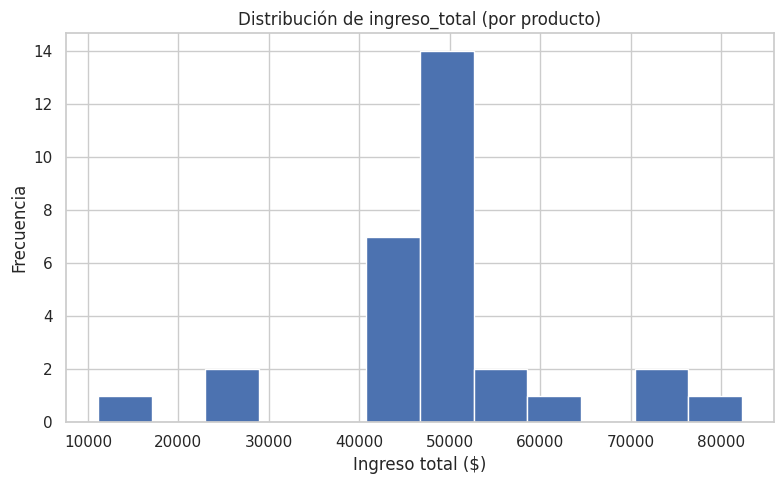

In [ ]:

# =========================================
# 📈 Histograma: distribución de ingreso_total (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

serie = resumen_prod['ingreso_total']        # elegimos la serie numérica a analizar

plt.figure(figsize=(8, 5))                   # definimos tamaño del gráfico
plt.hist(serie, bins=12)                     # dibujamos histograma con 12 intervalos
plt.title('Distribución de ingreso_total (por producto)')  # título del gráfico
plt.xlabel('Ingreso total ($)')              # etiqueta del eje X
plt.ylabel('Frecuencia')                     # etiqueta del eje Y
plt.tight_layout()                           # ajustamos márgenes para que no se corte el contenido
plt.show()                                   # mostramos el gráfico
